# tf estimator API

## imports

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## getting data
We'll setup this data to be a representation of `y = mx + b`.

In [101]:
lower = 0
upper = 30
num_points = 1000
m_bounds = 10
b_bounds = 4
noise_scale = 10

In [102]:
x = np.linspace(start=lower, stop=upper, num=num_points)
m = np.random.randint(-m_bounds, m_bounds)
b = np.random.randint(-b_bounds, b_bounds)
m, b

(-3, -1)

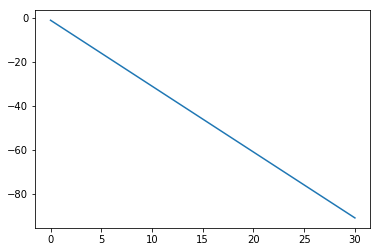

In [103]:
y_true = m*x + b
plt.plot(x, y_true, label="data")

### adding noise
We'll add noise from a random normal distribution to y_true.

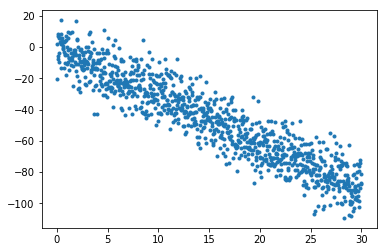

In [104]:
y_true += np.random.normal(scale=noise_scale, size=y_true.shape)
plt.plot(x, y_true, ".")

## feature columns
Below we'll setup a learning problem for a 1D dataset, with x being the single feature, and y being the anticipated dependent.

In [2]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [3]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': 'C:\\Users\\unknown\\AppData\\Local\\Temp\\tmpab7fcmmb', '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5}


## splitting the data

In [111]:
random_state = 101
test_size = 0.3
batch_size = 8
num_epochs = 1000

In [109]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y_true, test_size=test_size, random_state=random_state
)

## input function

In [110]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train},
    y=y_train,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True
)

In [112]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train},
    y=y_train,
    batch_size=batch_size,
    num_epochs=num_epochs,
    shuffle=False
)

In [113]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    {"x": x_test},
    y=y_test,
    batch_size=batch_size,
    num_epochs=num_epochs,
    shuffle=False
)

## training the estimator

In [114]:
estimator.train(input_fn=input_func, steps=num_epochs) 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\unknown\AppData\Local\Temp\tmpab7fcmmb\model.ckpt.
INFO:tensorflow:step = 1, loss = 28493.4
INFO:tensorflow:global_step/sec: 2047.63
INFO:tensorflow:step = 101, loss = 928.356 (0.050 sec)
INFO:tensorflow:global_step/sec: 2326.56
INFO:tensorflow:step = 201, loss = 284.097 (0.043 sec)
INFO:tensorflow:global_step/sec: 2214.25
INFO:tensorflow:step = 301, loss = 741.665 (0.045 sec)
INFO:tensorflow:global_step/sec: 2371.77
INFO:tensorflow:step = 401, loss = 484.519 (0.042 sec)
INFO:tensorflow:global_step/sec: 2278.81
INFO:tensorflow:step = 501, loss = 438.21 (0.044 sec)
INFO:tensorflow:global_step/sec: 2506.68
INFO:tensorflow:step = 601, loss = 724.778 (0.040 sec)
INFO:tensorflow:global_step/sec: 2179.72
INFO:tensorflow:step = 701, loss = 572.216 (0.046 sec)
INFO:tensorflow:global_step/sec: 2278.78
INFO:tensorflow:step = 801, loss = 950.867 (0.044 sec)
INFO:tensorflow:global_step/sec: 2100.92
I

### grabbing evaluation metrics from the estimator

In [115]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=num_epochs)

INFO:tensorflow:Starting evaluation at 2018-06-03-23:19:08
INFO:tensorflow:Restoring parameters from C:\Users\unknown\AppData\Local\Temp\tmpab7fcmmb\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [116]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=num_epochs)

INFO:tensorflow:Starting evaluation at 2018-06-03-23:19:47
INFO:tensorflow:Restoring parameters from C:\Users\unknown\AppData\Local\Temp\tmpab7fcmmb\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [118]:
print("training metrics:\n{}".format(train_metrics))
print("testing metrics:\n{}".format(test_metrics))

training metrics:
{'global_step': 1000, 'average_loss': 102.51149, 'loss': 820.09192}
testing metrics:
{'global_step': 1000, 'average_loss': 100.64467, 'loss': 805.15735}


### predicting new values

In [119]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {"x": x_test},
    shuffle=False
)

In [135]:
y_test_preds = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\unknown\AppData\Local\Temp\tmpab7fcmmb\model.ckpt-1000


In [136]:
y_test_preds[0]

{'predictions': array([-50.27891541], dtype=float32)}

In [139]:
y_test_preds = list(map(lambda e: e["predictions"][0], y_test_preds))
y_test_preds[0]

-50.278915

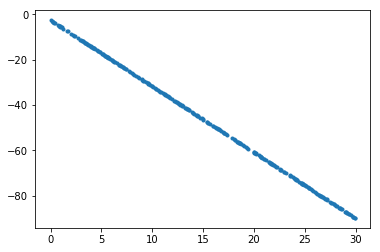

In [142]:
plt.plot(x_test, y_test_preds, ".")

In [130]:
pd.DataFrame([pd.Series(x_test), pd.Series(y_test)])

0          1         2          3          4          5          6    \
0  16.366366   8.948949  3.273273  25.135135   5.825826  18.168168   7.387387   
1 -67.829494 -43.354055 -6.072006 -84.995109 -23.118112 -57.482816 -43.085782   

         7          8          9      ...            290        291       292  \
0  20.810811  24.084084  12.192192    ...      18.618619  16.516517  0.810811   
1 -47.270597 -79.623957 -40.170251    ...     -64.219378 -50.819956 -5.073726   

         293        294        295        296        297        298        299  
0  21.621622  28.378378  25.435435  20.480480  26.546547   9.759760  14.474474  
1 -67.762054 -88.339610 -78.010720 -58.895407 -85.115890 -17.993052 -51.109737  

[2 rows x 300 columns]